In [1]:
#importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import plotly.graph_objs as go
# from plotly.offline import iplot
import matplotlib.cm as cm
import seaborn as sns
plt.ion()

# Récuperation des Données

In [2]:
dataset = pd.read_csv('kc_house_data.csv')  #récuperation du dataset
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
dataset.shape #Affichage du nombres de lignes et de colonnes

(21613, 21)

In [4]:
print(dataset.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [5]:
#L'ensemble des types de données des classes et si elle comporte des valeurs non-null
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
#Check si il y'a des valeurs null (manquante dans la dataset)
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Il n'y a aucune valeur null donc le dataset est complet

In [7]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Nous pouvons dès à présent relevés certains chiffres qui semblent être intéressant :

- certaines features sont des valeurs qualitatives : waterfront, view, condition, grade et yr_renovated qui est égale à l'année de rénovation si la maison a été rénové, 0 sinon.
    
- Les statistiques de sqft_living, sqft_basement, sqft_lot15 semblent avoir une valeur abérante:
    - sqft_living: les quartiles nous indique que la moyenne des maisons est d'environ entre 1420 et 2550 m² d'espace habitable,avec une moyenne de 2079m² tandis que la valeur maximale est de 13540m²
            
    - sqft_basement: les quartiles nous indique que la majorité des valeurs de cette variable est autour                               de 0m² et une autre autour de 560m² alors que on a une valeur maximale à 4820m²
    
    - bedrooms: les quartiles nous indique que la majorité des des valeurs de cette variable est autour                               de 3/4 chambres alors que nous avons une valeur maximale de 33 chambres.

In [8]:
dataset.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Exploration des données

Nous allons donc chercher une corélation entre 2 variables dont le prix qui est notre objectif final:

PRIX ET SQFT_LIVING :

Etant donné que la surface habitable est un critère important sur le prix, nous allons donc explorer les données

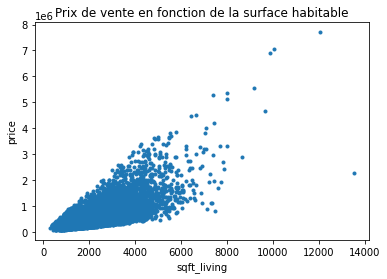

In [9]:
plt.plot(dataset['sqft_living'],dataset['price'],".")
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.title("Prix de vente en fonction de la surface habitable")
plt.show()

Remarques :
    - La majorité des ventes sont entre 300m² et 6000m² avec comme prix de vente entre 75000 et 280$

PRIX ET ID:

Nous allons maintenant voir si l'id peut avoir une bonne corélation avec le prix :

Text(0.5, 1.0, "Prix de vente en fonction de l'id")

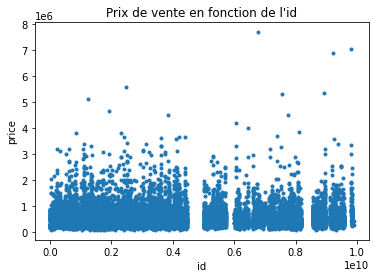

In [10]:
plt.plot(dataset['id'],dataset['price'],".")
plt.xlabel("id")
plt.ylabel("price")
plt.title("Prix de vente en fonction de l'id")

Nous remarquons uniquement que la majorité des ventes est en dessous de 200 000$ quelque sois l'id de vente.Il n'y a donc pas de corélation entre ces 2 variables (nous aurions pu penser que les id étaient donnée en fonction du prix de vente)

PRIX ET CHAMBRES :

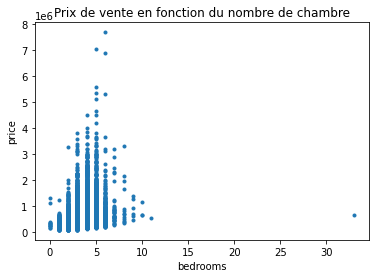

In [11]:
plt.plot(dataset['bedrooms'],dataset['price'],".")
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.title("Prix de vente en fonction du nombre de chambre")
plt.show()

Ayant une potentielle corrélation entre le nombre de chambres et le prix, nous allons affiné la data :

In [12]:
#Cherchons les différentes valeurs de chambres présente dans le dataset:
dataset.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

Text(0.5, 1.0, 'Prix de vente en fonction du nombre de chambres')

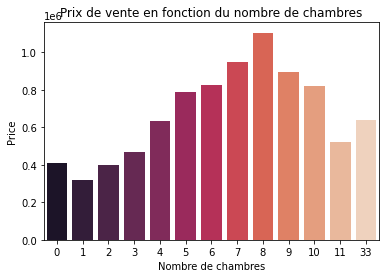

In [13]:
test = dataset.groupby('bedrooms').price.mean()          #Graphique prix par rapport à la moyenne de chambre
sns.barplot(x=test.index,y=test.values,palette="rocket")
plt.xlabel("Nombre de chambres")
plt.ylabel("Price")
plt.title("Prix de vente en fonction du nombre de chambres")

On remarque une net augmentation de la moyenne du prix de vente jusqu'à 8 chambres jusqu'à atteindre son maximum à 8 puis redescendre jusqu'à 11 puis remonter à son extremum c'est à dire 33.


Passons maintenant au prix de vente de chaque maison en fonction du nombre de chambres.

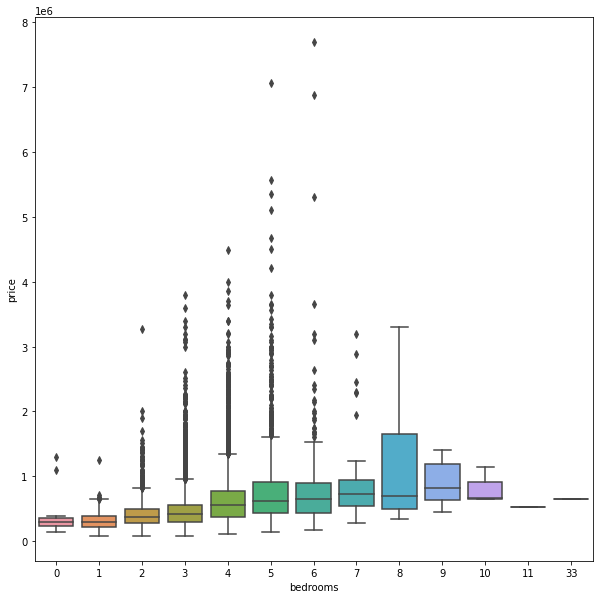

In [14]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x="bedrooms", y="price", data=dataset)

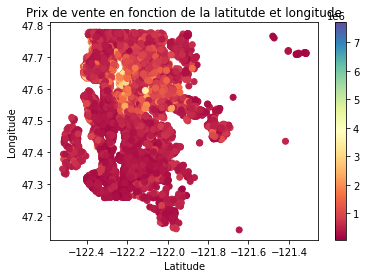

In [15]:
plt.scatter(x= dataset['long'], y= dataset['lat'], c=dataset['price'], cmap='Spectral')
plt.colorbar()
plt.title('Prix de vente en fonction de la latitutde et longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

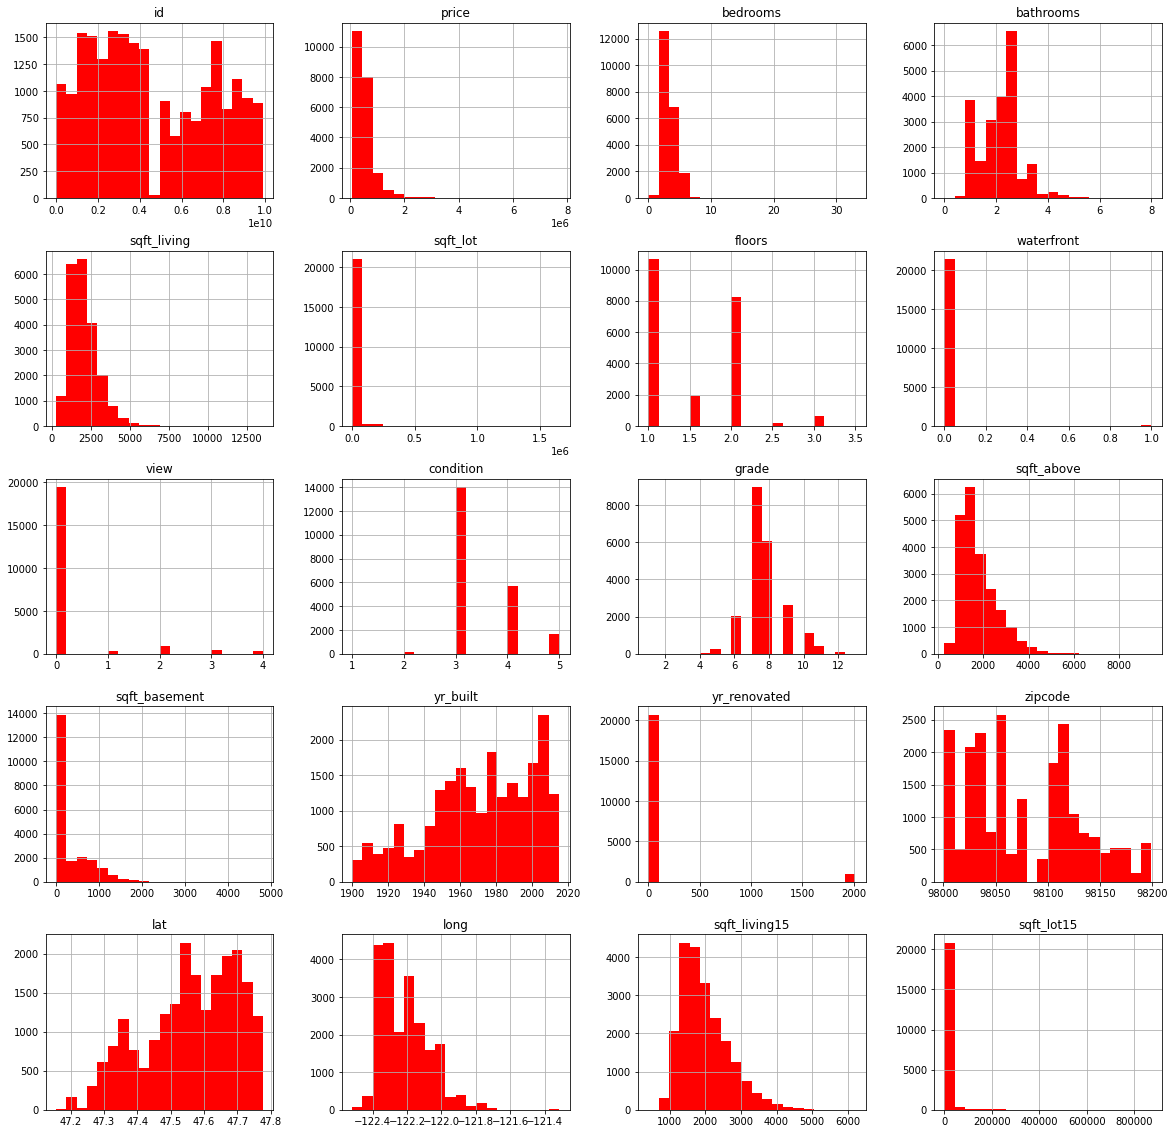

In [16]:
dataset.hist(bins = 20, figsize = (20,20), color = 'r')        #Plot de touts nos labels
# sns.pairplot(dataset)

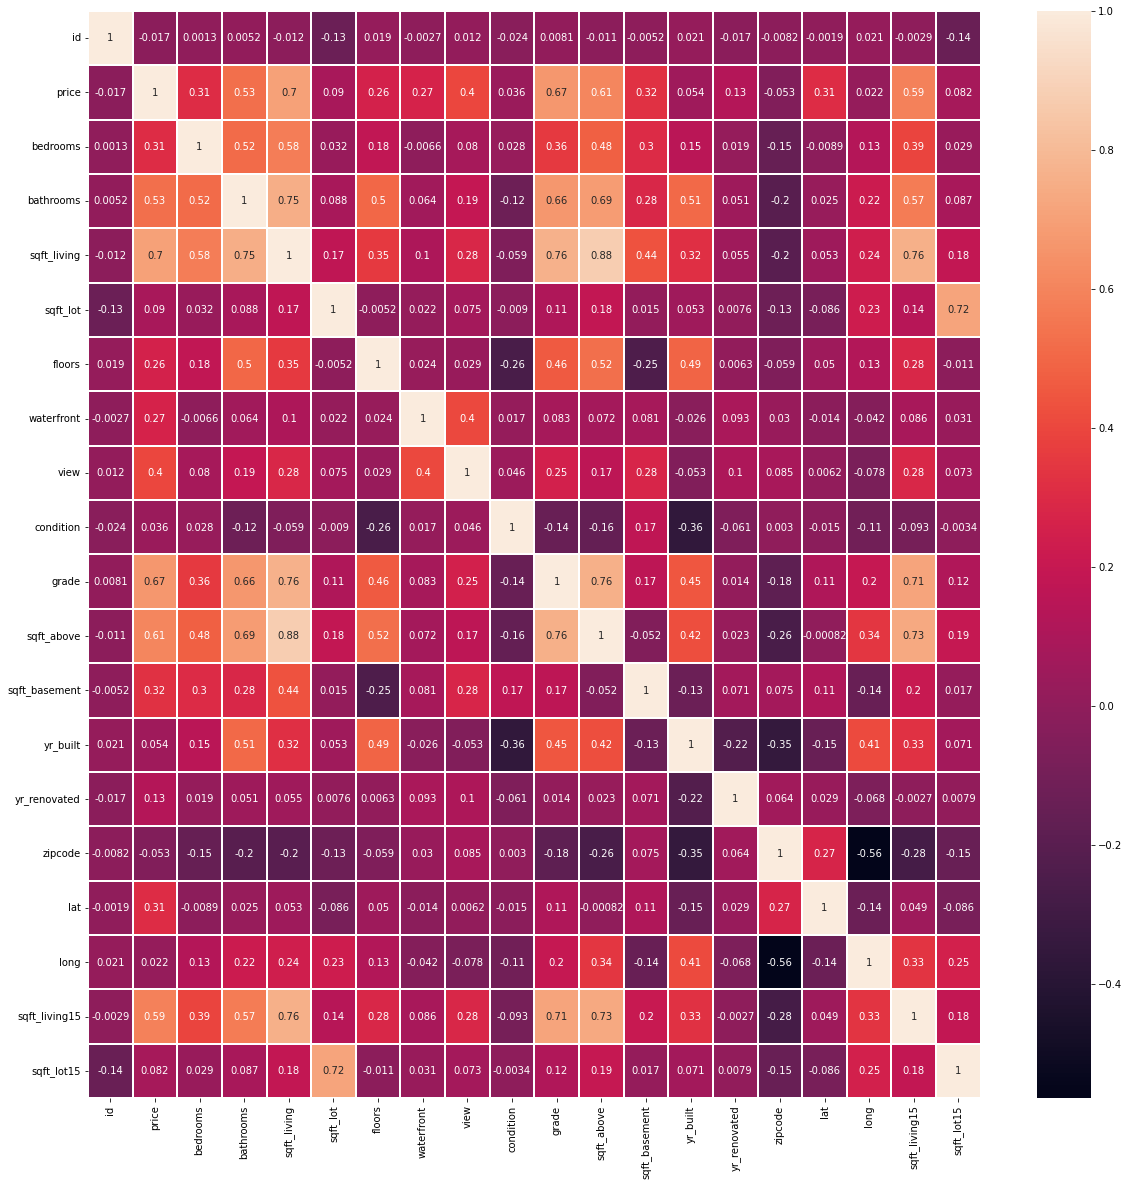

In [17]:
f, ax = plt.subplots(figsize = (20, 20))                #Heatmap de correlation
sns.heatmap(dataset.corr(), annot = True, linewidths=.05);

# Raffinage des données


## Suppression de la donnée aberrante

In [18]:
dataset_r = dataset.drop(index=dataset[dataset["bedrooms"]==33].index)

## Suppression des features inutiles

In [19]:
dataset_r.drop(columns=["id","sqft_lot15","long","zipcode","yr_built","condition","sqft_lot"],inplace=True)
dataset_r.head(3)

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15
0,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,1340
1,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,1690
2,20150225T000000,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,2720


## Formatage des features

### mise en forme de la date

La date est une chaine de caractère au format:

       YearMoDaT000000
    ex:20150225T000000
    
on veut passer à une valeur entière plus exploitable:

    ex:20150225

In [20]:
dataset_r["date"] = dataset_r["date"].transform(lambda x: x[:8])
dataset_r["date"] = dataset_r["date"].transform(lambda x: int(x))
dataset_r.head(3)

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15
0,20141013,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,1340
1,20141209,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,1690
2,20150225,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,2720


In [21]:
Y = dataset_r["price"]
X = dataset_r.drop("price", axis=1)

In [22]:
from sklearn.model_selection import train_test_split   #Création du train et test split avec 40% pour 60% de train

test_size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=10)
X_train.shape

(12967, 13)

# Choix du modèle

In [23]:
#les modeles
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
# from yellowbrick import PredictionError
#Pour l'optimisation
from sklearn.model_selection import GridSearchCV
#Pour l'evaluation des modeles
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [24]:
models = []
seed = 42 #On aura le meme resultat a chaque fois

models.append(
    ("Linear Regression", 
    Pipeline(
        [# [("Scaler", StandardScaler()), 
        ("Lin_Reg", LinearRegression())])
    )
)

models.append(
    ("Ridge Regression",
     Pipeline(
        [#  [("Scaler", StandardScaler()),
          ("Ridge", Ridge(random_state=seed, alpha=1.0))])
     )
)

models.append(
    ("Random Forest Regression",
     Pipeline(
        [#  [("Scaler", StandardScaler()),
          ("Random Forest", RandomForestRegressor(random_state=seed))])
     )
)

models.append(
    ("KNN Regression",
     Pipeline(
         [("Scaler", StandardScaler()),
          ("KNN", KNeighborsRegressor())])
     )
)


Linear Regression: 66.038714 (+/- 2.697307)


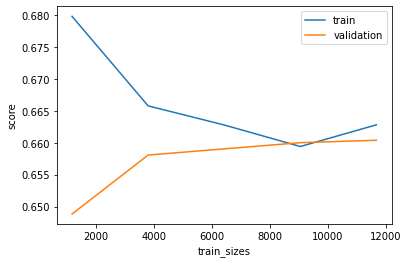

Ridge Regression: 66.040989 (+/- 2.689465)


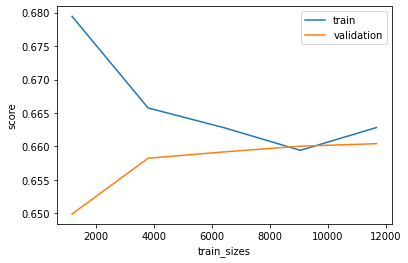

Random Forest Regression: 80.758489 (+/- 2.139944)


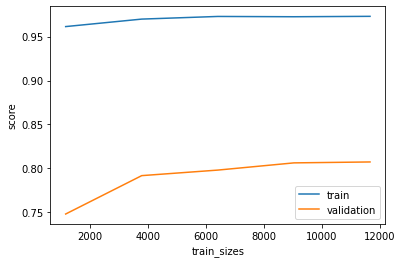

KNN Regression: 73.397573 (+/- 2.363457)


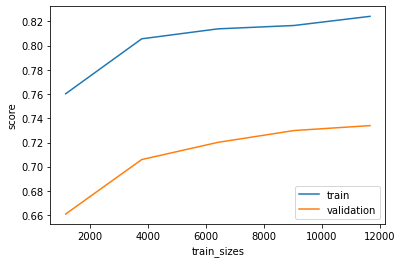

In [25]:
#Differente methode d'evaluation : "mean_squared_error", "mean_absolute_error", "r2"
scoring = 'r2'
n_folds = 10
N, train_score, val_score, results, names = [], [], [] , [], []

for name, model in models:

    kfold = KFold(n_splits=n_folds)
    cross_val_results = cross_val_score(model, X_train, y_train, cv=kfold,
                                 scoring=scoring, n_jobs=-1)
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv = kfold)

    names.append(name)
    results.append(cross_val_results)

    msg = "%s: %f (+/- %f)" % (name, cross_val_results.mean() * 100,  cross_val_results.std() * 100)
    print(msg)

    plt.plot(N, train_score.mean(axis=1), label="train")
    plt.plot(N, val_score.mean(axis=1), label="validation")
    plt.xlabel('train_sizes')
    plt.ylabel('score') 
    plt.legend()
    plt.show()

# Polynome Degre 2

Linear Regression: 73.939907 (+/- 3.418102)


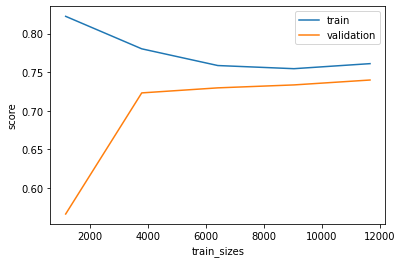

Ridge Regression: 74.051896 (+/- 3.473181)


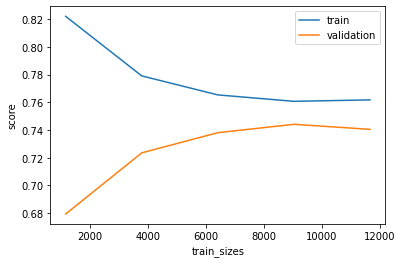

Random Forest Regression: 80.110574 (+/- 2.288493)


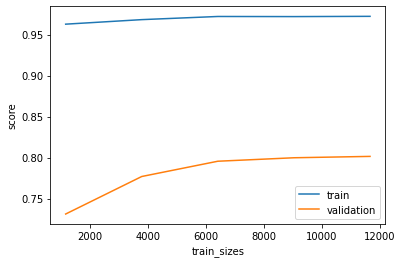

KNN Regression: 70.393158 (+/- 2.877030)


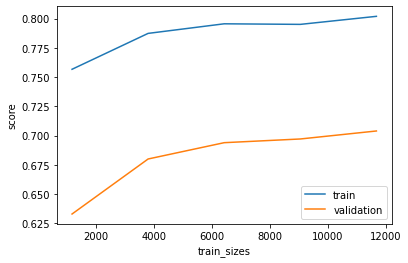

In [26]:
#Differente methode d'evaluation : "mean_squared_error", "mean_absolute_error", "r2"
scoring = 'r2'
n_folds = 10
N, train_score, val_score, results, names = [], [], [] , [], []
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_TRANS = poly.fit_transform(X_train)

for name, model in models:

    kfold = KFold(n_splits=n_folds)
    cross_val_results = cross_val_score(model, X_train_TRANS, y_train, cv=kfold,
                                 scoring=scoring, n_jobs=-1)
    N, train_score, val_score = learning_curve(model, X_train_TRANS, y_train, cv = kfold)

    names.append(name)
    results.append(cross_val_results)

    msg = "%s: %f (+/- %f)" % (name, cross_val_results.mean() * 100,  cross_val_results.std() * 100)
    print(msg)

    plt.plot(N, train_score.mean(axis=1), label="train")
    plt.plot(N, val_score.mean(axis=1), label="validation")
    plt.xlabel('train_sizes')
    plt.ylabel('score') 
    plt.legend()
    plt.show()

# Optimisation

In [ ]:
from sklearn.model_selection import GridSearchCV

#Optimisation du randomforest parce que c'est le modèle qui nous donne les meilleures performances
param_dict = {
    'bootstrap': [True, False],
    'max_depth': [10,25,50,75,80],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [5,8, 10, 12],
    'n_estimators': [50,65,75,80,90,100, 120]
}

grid = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_dict, cv=3, n_jobs=-1, verbose=2)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
rf_best_param = grid.best_params_
print(rf_best_param)
best_rf = grid.best_estimator_

In [ ]:
k_range = range(1, 30)
param_dict = {
    "n_neighbors" : k_range,
    "weights" : ['uniform', 'distance']
}

grid = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_dict, cv=5, n_jobs=-1, verbose=2)


In [ ]:
grid.fit(X_train, y_train)

In [ ]:
kn_best_param = grid.best_params_
print(kn_best_param)
best_kn = grid.best_estimator_

In [ ]:
best_rf

In [ ]:
best_rf.score(X_test, y_test) 

In [ ]:
best_kn.score(X_test, y_test) 

In [ ]:
feature_imp = pd.Series(best_rf.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
feature_imp


In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()
